In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv(r".\digit recognizor.csv")
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X.shape#(42000, 784)


(42000, 784)

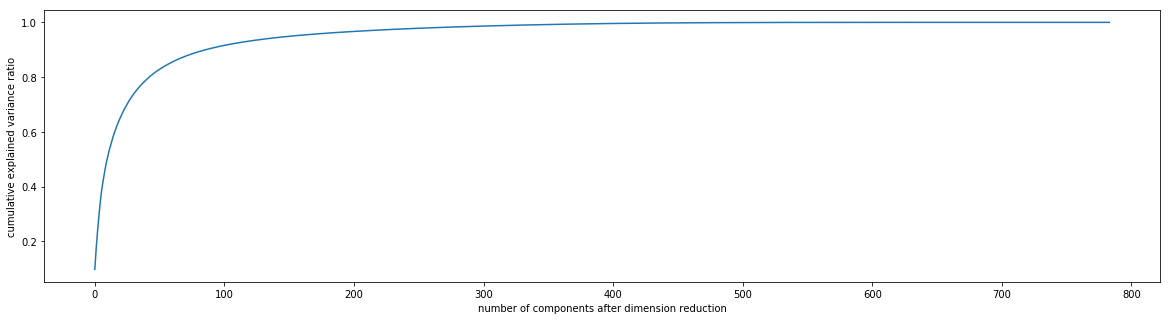

In [3]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()


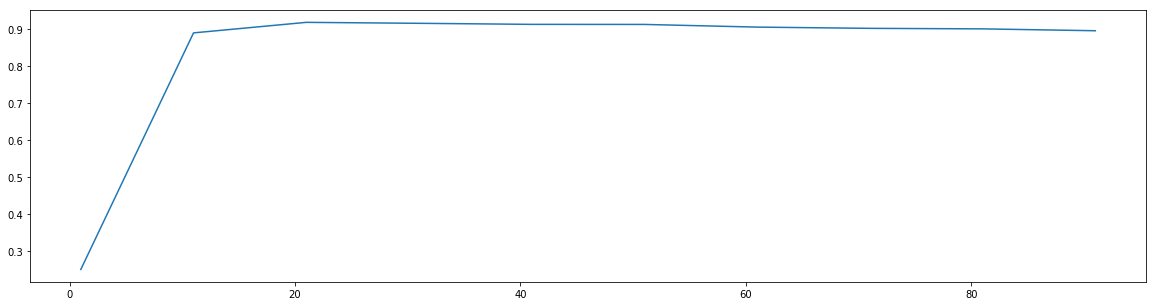

In [4]:
#======【TIME WARNING：2mins 30s】======#
 
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

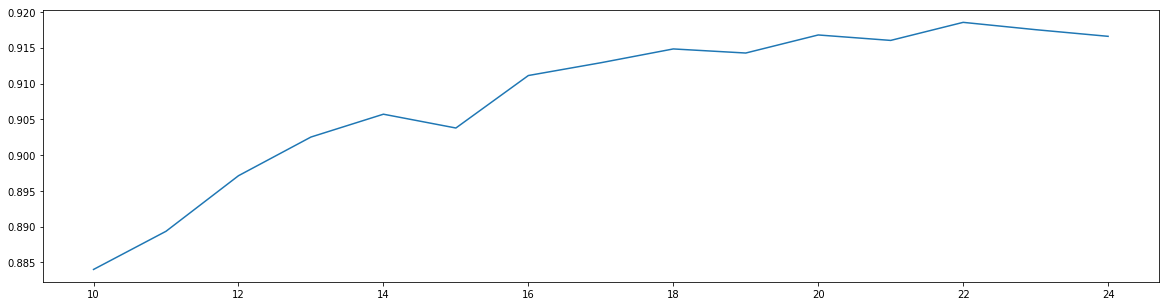

In [5]:
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [6]:
X_dr = PCA(22).fit_transform(X)
 
#======【TIME WARNING:1mins 30s】======#
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()#0.946524472295366

0.946524472295366

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()#KNN()的值不填写默认=5    0.9698566872605972


0.9698566872605972

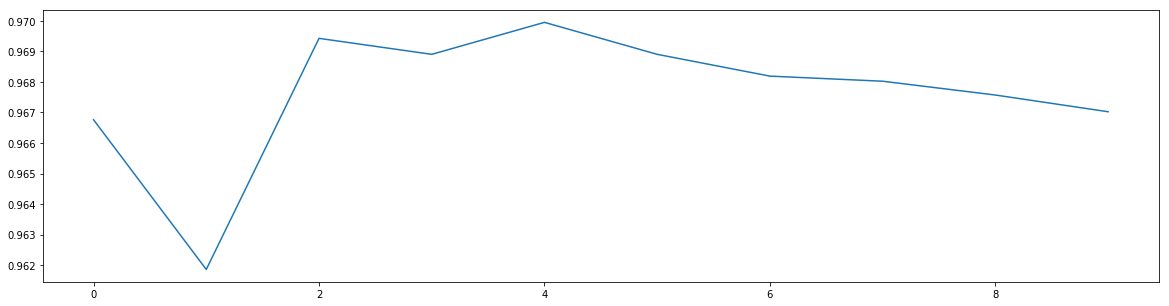

In [8]:
#======【TIME WARNING: 】======#

score = []
for i in range(10):
    X_dr = PCA(22).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [9]:
cross_val_score(KNN(4),X_dr,y,cv=5).mean()#KNN()的值不填写默认=5
 
 
#=======【TIME WARNING: 3mins】======#
%%timeit
cross_val_score(KNN(4),X_dr,y,cv=5).mean()


SyntaxError: invalid syntax (<ipython-input-9-3d6100376612>, line 5)